In [ ]:
#!rm -r /content/sample_data/*

In [ ]:
!pip install matplotlib


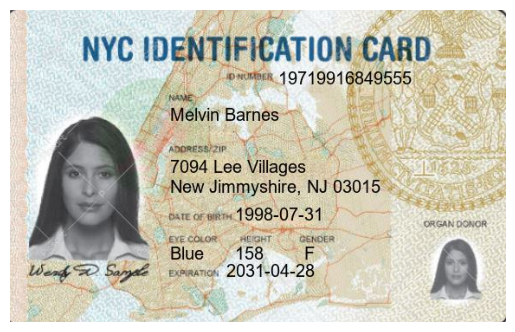

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = '/content/sample_data/image_test0.jpg'

# Load the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
!pip install opencv-python


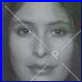

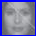

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Load the image
image_path = '/content/sample_data/image_test0.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (for face detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load pre-trained face classifier (haarcascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Extract detected faces
for (x, y, w, h) in faces:
    # Draw a rectangle around the detected face (optional)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Extract the face from the image
    extracted_face = image[y:y+h, x:x+w]

    # Show the extracted face
    cv2_imshow(extracted_face)


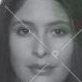

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/sample_data/image_test0.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (for face detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load pre-trained face classifier (haarcascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Find the largest face among those detected
largest_face = None
largest_area = 0

for (x, y, w, h) in faces:
    current_area = w * h
    if current_area > largest_area:
        largest_area = current_area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    x, y, w, h = largest_face
    largest_face_image = image[y:y+h, x:x+w]

    # Show the largest face
    cv2_imshow(largest_face_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No face detected or unable to determine the largest face.")

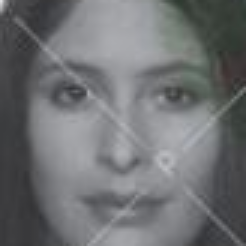

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/sample_data/image_test0.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (for face detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load pre-trained face classifier (haarcascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Find the largest face among those detected
largest_face = None
largest_area = 0

for (x, y, w, h) in faces:
    current_area = w * h
    if current_area > largest_area:
        largest_area = current_area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    x, y, w, h = largest_face
    largest_face_image = image[y:y+h, x:x+w]
    enlargement_factor = 3  # Factor by which to enlarge the image (2 to double the size, for example)
    height, width = largest_face_image.shape[:2]  # Get the image size
    new_width = int(width * enlargement_factor)
    new_height = int(height * enlargement_factor)
    enlarged_image = cv2.resize(largest_face_image, (new_width, new_height))

    # Show the enlarged face
    cv2_imshow(enlarged_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
!pip uninstall dlib
!pip install dlib==19.22.0
!pip install face_recognition

In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
print(face_recognition.__version__)

1.2.3


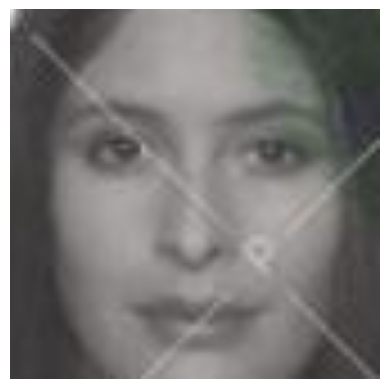

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
plt.imshow(image_agrandie)
plt.axis('off')  
plt.show()


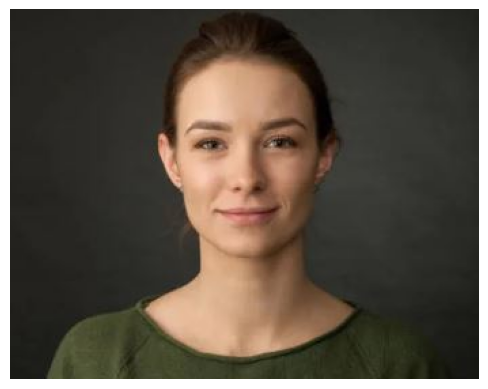

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


chemin_image = '/content/sample_data/image_ref.jpg'


img = mpimg.imread(chemin_image)
plt.imshow(img)
plt.axis('off')  
plt.show()

############################ comparaison de 2 visages #################

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import face_recognition

# Load the reference image
image_reference = face_recognition.load_image_file('/content/sample_data/image_ref.jpg')

# Find facial encodings for both images
my_encoding = face_recognition.face_encodings(enlarged_image)[0]
reference_encoding = face_recognition.face_encodings(image_reference)[0]

# Compare facial encodings
comparison_result = face_recognition.compare_faces([my_encoding], reference_encoding)

# Check the comparison result
if comparison_result[0]:
    print("Les visages correspondent.")
else:
    print("Les visages ne correspondent pas.")

Les visages ne correspondent pas.


#################### comparaison en temps reel ########

In [1]:
# !rm -r /content/sample_data/*

In [ ]:
!pip install face_recognition

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import face_recognition

# Load the reference image
image_reference = face_recognition.load_image_file('/content/sample_data/image_ref.jpg')
reference_encoding = face_recognition.face_encodings(image_reference)[0]

# Create the script to access the webcam
def init_camera():
    js = Javascript('''
        async function startCamera() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            // Collect webcam data
            var canvas = document.createElement('canvas');
            var context = canvas.getContext('2d');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            div.appendChild(canvas);
            setInterval(() => {
                context.drawImage(video, 0, 0, canvas.width, canvas.height);
                // Send the capture to the backend
                google.colab.kernel.invokeFunction('notebook.capture', [canvas.toDataURL('image/jpeg', 0.8)]);
            }, 100);
        }
        startCamera();
    ''')
    display(js)

# Initialize the webcam
init_camera()

# Capture the video sent by the webcam
def capture(data):
    b64 = data.split(',')[1]
    byte_data = b64decode(b64)
    img = cv2.imdecode(np.frombuffer(byte_data, np.uint8), -1)

    # Convert the image to RGB (Face Recognition requires RGB format)
    rgb_img = img[:, :, ::-1]

    # Find faces in the camera image
    faces_cam = face_recognition.face_encodings(rgb_img)

    # Compare facial encodings
    face_found = False
    for face_encoding in faces_cam:
        comparison_result = face_recognition.compare_faces([reference_encoding], face_encoding)
        if comparison_result[0]:
            face_found = True

    # Display message in the notebook
    if face_found:
        print("La même personne")
    else:
        print("Pas la même personne")

# Define output as an instance of the Colab notebook output
from google.colab import output
output.register_callback('notebook.capture', capture)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import face_recognition

# Load the reference image
image_reference = face_recognition.load_image_file('/content/sample_data/image_ref.jpg')
reference_encoding = face_recognition.face_encodings(image_reference)[0]

# Variable to indicate if the face has been found
face_found = False

# Create the script to access the webcam
def init_camera():
    js = Javascript('''
        async function startCamera() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            // Collect webcam data
            var canvas = document.createElement('canvas');
            var context = canvas.getContext('2d');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            div.appendChild(canvas);
            setInterval(() => {
                context.drawImage(video, 0, 0, canvas.width, canvas.height);
                // Send the capture to the backend if the face has not been found
                if (!window.face_found) {
                    google.colab.kernel.invokeFunction('notebook.capture', [canvas.toDataURL('image/jpeg', 0.8)]);
                }
            }, 100);
        }
        startCamera();
    ''')
    display(js)

# Initialize the webcam
init_camera()

# Capture the video sent by the webcam
def capture(data):
    global face_found
    if not face_found:
        b64 = data.split(',')[1]
        byte_data = b64decode(b64)
        img = cv2.imdecode(np.frombuffer(byte_data, np.uint8), -1)

        # Convert the image to RGB (Face Recognition requires RGB format)
        rgb_img = img[:, :, ::-1]

        # Find faces in the camera image
        faces_cam = face_recognition.face_encodings(rgb_img)

        # Compare facial encodings
        for face_encoding in faces_cam:
            comparison_result = face_recognition.compare_faces([reference_encoding], face_encoding)
            if comparison_result[0]:
                face_found = True
                print("Le même visage.")
                break

# Define output as an instance of the Colab notebook output
from google.colab import output
output.register_callback('notebook.capture', capture)
